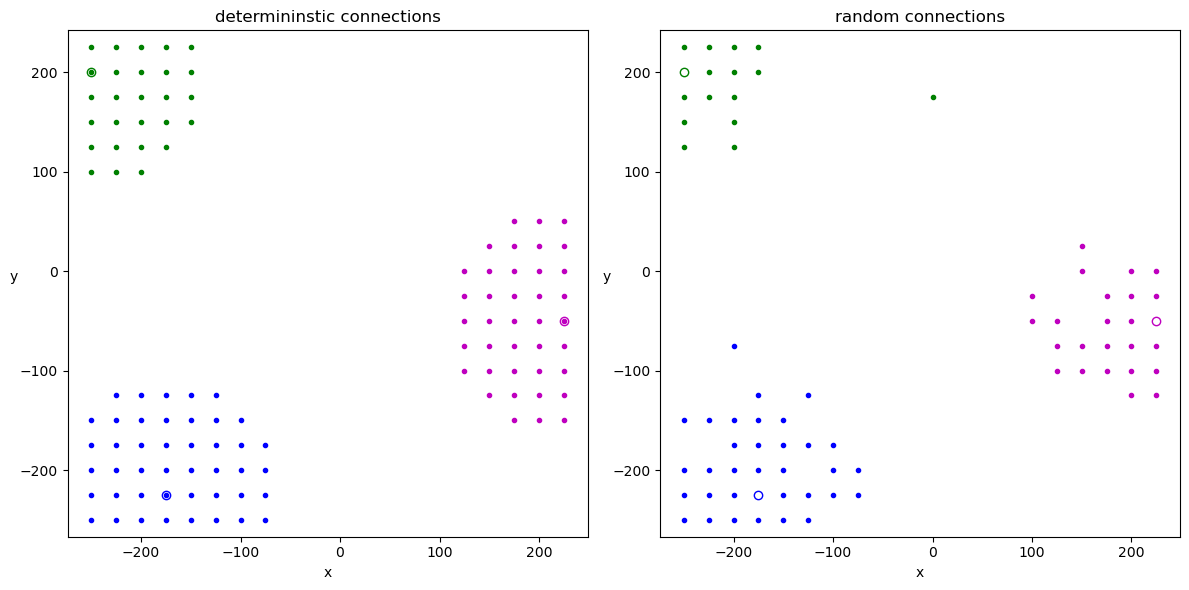

In [1]:
from brian2 import *

rows, cols = 20, 20
G = NeuronGroup(rows * cols, '''x : meter
                                y : meter''')
# initialize the grid positions
grid_dist = 25*umeter
G.x = '(i // rows) * grid_dist - rows/2.0 * grid_dist'
G.y = '(i % rows) * grid_dist - cols/2.0 * grid_dist'

# Deterministic connections
distance = 120*umeter
S_deterministic = Synapses(G, G)
S_deterministic.connect(
    'sqrt((x_pre - x_post)**2 + (y_pre - y_post)**2) < distance')

# Random connections (no self-connections)
S_stochastic = Synapses(G, G)
S_stochastic.connect('i != j',
                     p='1.5 * exp(-((x_pre-x_post)**2 + (y_pre-y_post)**2)/(2*(60*umeter)**2))')

figure(figsize=(12, 6))

# Show the connections for some neurons in different colors
for color in ['g', 'b', 'm']:
    subplot(1, 2, 1)
    neuron_idx = np.random.randint(0, rows*cols)
    plot(G.x[neuron_idx] / umeter, G.y[neuron_idx] / umeter, 'o', mec=color,
         mfc='none')
    plot(G.x[S_deterministic.j[neuron_idx, :]] / umeter,
         G.y[S_deterministic.j[neuron_idx, :]] / umeter, color + '.')
    subplot(1, 2, 2)
    plot(G.x[neuron_idx] / umeter, G.y[neuron_idx] / umeter, 'o', mec=color,
         mfc='none')
    plot(G.x[S_stochastic.j[neuron_idx, :]] / umeter,
         G.y[S_stochastic.j[neuron_idx, :]] / umeter, color + '.')

for idx, t in enumerate(['determininstic connections',
                         'random connections']):
    subplot(1, 2, idx + 1)
    xlim((-rows/2.0 * grid_dist) / umeter, (rows/2.0 * grid_dist) / umeter)
    ylim((-cols/2.0 * grid_dist) / umeter, (cols/2.0 * grid_dist) / umeter)
    title(t)
    xlabel('x')
    ylabel('y', rotation='horizontal')
    axis('equal')

tight_layout()
show()